# House prices - Advanced Regression techniques

![House Pices - Advanced Regression Techniques](kaggle_5407_media_housesbanner.png)

###  Importação de Bibliotecas

In [411]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


###  Leitura e Pré-processamento de Dados

In [441]:
# Importando o dataset de treino 
base = pd.read_csv('train.csv')

# Visualizando a base
print("Primeiras linhas da base de treino:")
print(base.head())

# Retornando o shape da base e as informações
print("Formato da base:", base.shape)
print(base.info())

# Visualizando a quantidade de valores vazios 
percent_missing = (base.isnull().sum() / base.shape[0]).sort_values(ascending=False)
print("Porcentagem de valores vazios nas colunas:")
print(percent_missing.head(20))

# Eliminando colunas com mais de 10% de valores vazios, exceto 'Id'
eliminar = base.columns[(percent_missing > 0.1) & (base.columns != 'Id')]
base = base.drop(eliminar, axis=1)

# Selecionando apenas as colunas numéricas, mantendo 'Id'
colunas = base.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' not in colunas:
    colunas.insert(0, 'Id')  # Adiciona 'Id' se ainda não estiver na lista
base2 = base[colunas]

Primeiras linhas da base de treino:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditio

### Importação e Preparação dos Dados de Teste

In [447]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)
teste = teste.select_dtypes(include=[np.number])  # Mantendo apenas as colunas numéricas
teste.fillna(-1, inplace=True)  # Substituindo valores vazios por -1

# Verificando e tratando valores ausentes na base de treino
base2.fillna(-1, inplace=True)  # Substituindo valores vazios por -1 na base de treino


C:\Users\Portaria2\AppData\Local\Temp\ipykernel_21284\536313441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2.fillna(-1, inplace=True)  # Substituindo valores vazios por -1 na base de treino


###  Divisão de Dados e Modelagem

In [449]:
# Selecionar X e Y
X = base2.drop('SalePrice', axis=1)
y = base2['SalePrice']

# Verificando se existem valores ausentes em X e y
if X.isnull().sum().sum() > 0:
    print("Existem valores ausentes em X. A quantidade de valores ausentes é:", X.isnull().sum().sum())
if y.isnull().sum() > 0:
    print("Existem valores ausentes em y. A quantidade de valores ausentes é:", y.isnull().sum())

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelagem
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=2)
}

# Treinando e prevendo com os modelos
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


### Avaliação dos Modelos

In [452]:
# Avaliando os modelos
for name, pred in predictions.items():
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")


Regressão Linear - MAE: 22798.07, MSE: 1211046723.94
Árvore de Decisão - MAE: 26787.60, MSE: 1867190411.64
KNN - MAE: 28574.28, MSE: 1980507941.80


###  Visualização dos Resultados

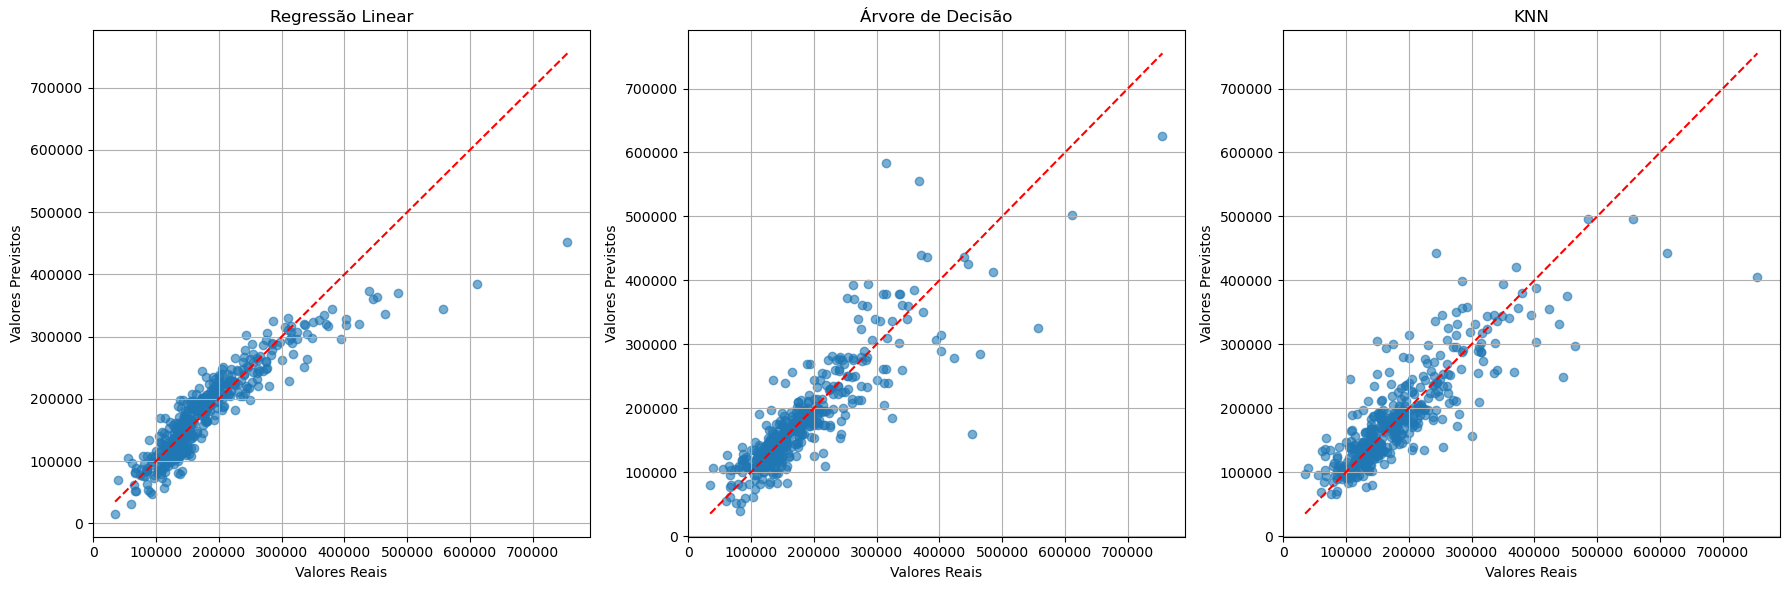

In [455]:

# Visualizando os resultados
plt.figure(figsize=(18, 6))

for i, (name, pred) in enumerate(predictions.items(), start=1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(name)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.grid()

plt.tight_layout()
plt.show()


### Previsões para a Base de Teste e Exportação do Resultado

In [458]:
# Fazendo previsões na base de teste
y_pred = models["Regressão Linear"].predict(teste)

# Adicionando a coluna de previsão na base de teste
teste['SalePrice'] = y_pred

# Adicionando a coluna 'Id' na base de teste
resultado = teste[['Id', 'SalePrice']]

# Exportando a base com resultados
resultado.to_csv('resultado.csv', index=False) 
print("Resultados exportados para 'resultado.csv'")

Resultados exportados para 'resultado.csv'


In [462]:
resultado.to_csv('resultados.csv', index=False)